# **URBN PL 213 - Final Project: Machine Learning Model**
### Kongpob Leemingsawat
### 5/30/2023

## **Importing the neccessary libraries and overview of the dataset**

In [ ]:
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns 

import warnings 
warnings.filterwarnings("ignore")

# Removes the limit for the number of displayed columns

pd.set_option("display.max_columns", None)

# Sets the limit for the number of displayed rows

pd.set_option("display.max_rows", 200)

# To build models for prediction

from sklearn.model_selection import train_test_split, cross_val_score, KFold

from sklearn.linear_model import LinearRegression, Ridge, Lasso

from sklearn.tree import DecisionTreeRegressor

from sklearn.ensemble import RandomForestRegressor,BaggingRegressor

from sklearn.preprocessing import LabelEncoder

# For tuning the model

from sklearn.model_selection import GridSearchCV

# To check the model performance

from sklearn.metrics import make_scorer,mean_squared_error, r2_score, mean_absolute_error

**Loading the dataset**

In [ ]:
# Connect with GoogleDrive 
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Import the dataset

data = pd.read_csv("/content/drive/MyDrive/UCLA MPP/URBN PL 213/Data/completed_dataset.csv")

In [ ]:
# Copying data to another variable to avoid any changes to the original data

same_data = data.copy()

In [ ]:
# View the first 5 rows of the dataset 

data.head()

,Unnamed: 0,index,id,station_name,open_date,status_code,fuel_type_code,ev_connector_types,ev_network,groups_with_access_code,access_days_time,street_address,city,zip,state,longitude,latitude,geometry,index_right,Tract,ZIP,County,ApproxLoc,TotPop19,CIscore,CIscoreP,Ozone,OzoneP,PM2_5,PM2_5_P,DieselPM,DieselPM_P,Pesticide,PesticideP,Tox_Rel,Tox_Rel_P,Traffic,TrafficP,DrinkWat,DrinkWatP,Lead,Lead_P,Cleanup,CleanupP,GWThreat,GWThreatP,HazWaste,HazWasteP,ImpWatBod,ImpWatBodP,SolWaste,SolWasteP,PollBurd,PolBurdSc,PolBurdP,Asthma,AsthmaP,LowBirtWt,LowBirWP,Cardiovas,CardiovasP,Educatn,EducatP,Ling_Isol,Ling_IsolP,Poverty,PovertyP,Unempl,UnemplP,HousBurd,HousBurdP,PopChar,PopCharSc,PopCharP,Child_10,Pop_10_64,Elderly65,Hispanic,White,AfricanAm,NativeAm,OtherMult,Shape_Leng,Shape_Area,AAPI,Median HH Income,n_ev,n_roads,n_highways,dist_to_rd,dist_to_hw,n_rd_buffer,n_hw_buffer
0,0,0,1517,LADWP - Truesdale Center,1999-10-15,E,ELEC,"['CHADEMO', 'J1772', 'J1772COMBO']",Non-Networked,Private,Fleet use only,11797 Truesdale St,Sun Valley,91352,CA,-118.387971,34.248319,POINT (-118.3879713743439 34.2483191527193),61,6037121102,91352,Los Angeles,Los Angeles,2479,46.994496,84.430156,0.065915,95.270691,11.353984,58.543871,0.183486,58.942128,0.000000,0.000000,827.866028,60.965241,992.603908,57.4125,726.638249,83.127264,61.880579,68.355388,81.30,98.749533,22.95,71.990702,4.405,97.418928,7.0,66.736665,63.4,99.977090,69.209618,8.450481,98.095831,57.99,66.787139,3.97,25.904542,11.88,45.077268,30.7,80.916224,2.3,18.107998,44.7,75.716080,4.3,35.020822,35.8,96.730038,53.610608,5.561163,55.421079,8.6325,73.7394,17.6281,48.4873,45.9459,0.0000,0.0000,1.4925,11461.974301,7.542610e+06,4.0742,48750.0,2,72,5.0,50.553886,912.156136,4,NaN
1,1,1,1519,LADWP - West LA District Office,2020-02-28,E,ELEC,['J1772'],Non-Networked,Private,0,1394 S Sepulveda Blvd,Los Angeles,90024,CA,-118.448504,34.052542,POINT (-118.448504 34.052542),1063,6037701100,90049,Los Angeles,Unincorporated Los Angeles County area,1101,38.717942,73.134140,0.049432,59.850653,11.655497,64.617299,0.562748,91.810828,0.004307,9.413793,1471.183329,72.755689,4040.448172,98.7875,440.638034,52.716373,-999.000000,-999.000000,16.10,76.801045,17.50,64.220488,1.235,88.232958,0.0,0.000000,6.3,80.549828,63.506206,7.754095,94.660859,13.61,2.629611,-999.00,-999.000000,7.60,10.817547,22.4,68.969881,-999.0,-999.000000,83.9,99.685930,41.1,99.986986,-999.0,-999.000000,48.135589,4.993225,47.566818,2.8156,77.7475,19.4369,26.5213,36.7847,22.4342,0.0000,4.6322,8588.373341,2.532709e+06,9.6276,45536.0,2,61,14.0,10.353718,0.966105,50,14.0
2,2,2,1523,Los Angeles Convention Center,1995-08-30,E,ELEC,['J1772'],Non-Networked,Public,5:30am-9pm; pay lot,1201 S Figueroa St,Los Angeles,90015,CA,-118.271387,34.040539,POINT (-118.271387 34.040539),533,6037224010,90015,Los Angeles,Los Angeles,2845,62.728200,96.961674,0.046767,48.450529,12.226077,88.848787,1.138331,98.767890,0.000000,0.000000,2289.676616,81.395349,2299.077818,90.6625,787.940335,92.531535,66.761764,75.097669,6.80,47.648376,22.50,71.691848,1.170,87.452019,0.0,0.000000,0.0,0.000000,61.765671,7.541576,93.018046,81.70,86.104187,5.74,69.681807,14.22,61.714855,30.2,80.460643,18.4,84.165652,62.2,93.115578,-999.0,-999.000000,32.4,93.726236,80.183655,8.317651,92.700454,6.5378,82.1090,11.3533,57.6098,13.8489,17.6450,0.0000,1.5466,4231.359659,8.277289e+05,9.3497,28082.0,7,90,6.0,55.780822,238.366528,162,9.0
3,3,3,1525,LADWP - John Ferraro Building,1999-10-15,E,ELEC,"['CHADEMO', 'J1772', 'J1772COMBO']",Non-Networked,Private,For fleet and employee use only,111 N Hope St,Los Angeles,90012,CA,-118.248589,34.059133,POINT (-118.248589 34.059133),402,6037207400,90012,Los Angeles,Los Angeles,1539,51.779581,89.775593,0.047920,53.727442,12.625171,91.922838,1.054896,98.419415,0.168342,29.793103,2025.671285,79.557389,1934.587646,85.9625,787.940335,92.531535,-999.000000,-999.000000,37.15,92.459873,40.05,86.103271,2.135,93.077432,7.0,66.736665,15.0,96.013746,79.617897,9.721329,99.975109,30.75,26.33

**Cleaning the data**

In [ ]:
# 1. Keep only the columns that we need 

col_to_keep = ["Tract", "id", "station_name", "open_date", "status_code", "fuel_type_code", "ev_connector_types",
               "ev_network", "groups_with_access_code", "access_days_time", "street_address", "city", "zip",
               "state", "County", "TotPop19", "PM2_5_P", "TrafficP", "DrinkWatP", "HazWasteP", "SolWasteP",
               "PolBurdP", "AsthmaP", "EducatP", "PovertyP", "UnemplP", "HousBurdP", "Hispanic", "White", 
               "AfricanAm", "NativeAm", "OtherMult", "n_ev", "n_roads", "n_highways", "dist_to_rd", "dist_to_hw",
               "n_rd_buffer", "n_hw_buffer", "Median HH Income", "Shape_Leng", "Shape_Area", "AAPI","longitude",
               "latitude", "geometry"]

df = data[col_to_keep].copy()

# 2. Some columns contain -999.000000, let's replace this with 0

df.replace(-999.000000, 0, inplace=True)

# 3. Let's include open_year into our analysis 

df['open_year'] = pd.to_datetime(df['open_date'], errors='coerce').dt.year.fillna(0).astype(int)

# Look at the dataset again

df.head()

,Tract,id,station_name,open_date,status_code,fuel_type_code,ev_connector_types,ev_network,groups_with_access_code,access_days_time,street_address,city,zip,state,County,TotPop19,PM2_5_P,TrafficP,DrinkWatP,HazWasteP,SolWasteP,PolBurdP,AsthmaP,EducatP,PovertyP,UnemplP,HousBurdP,Hispanic,White,AfricanAm,NativeAm,OtherMult,n_ev,n_roads,n_highways,dist_to_rd,dist_to_hw,n_rd_buffer,n_hw_buffer,Median HH Income,Shape_Leng,Shape_Area,AAPI,longitude,latitude,geometry,open_year
0,6037121102,1517,LADWP - Truesdale Center,1999-10-15,E,ELEC,"['CHADEMO', 'J1772', 'J1772COMBO']",Non-Networked,Private,Fleet use only,11797 Truesdale St,Sun Valley,91352,CA,Los Angeles,2479,58.543871,57.4125,83.127264,97.418928,99.977090,98.095831,66.787139,80.916224,75.716080,35.020822,96.730038,48.4873,45.9459,0.0000,0.0000,1.4925,2,72,5.0,50.553886,912.156136,4,NaN,48750.0,11461.974301,7.542610e+06,4.0742,-118.387971,34.248319,POINT (-118.3879713743439 34.2483191527193),1999
1,6037701100,1519,LADWP - West LA District Office,2020-02-28,E,ELEC,['J1772'],Non-Networked,Private,0,1394 S Sepulveda Blvd,Los Angeles,90024,CA,Los Angeles,1101,64.617299,98.7875,52.716373,88.232958,80.549828,94.660859,2.629611,68.969881,99.685930,99.986986,0.000000,26.5213,36.7847,22.4342,0.0000,4.6322,2,61,14.0,10.353718,0.966105,50,14.0,45536.0,8588.373341,2.532709e+06,9.6276,-118.448504,34.052542,POINT (-118.448504 34.052542),2020
2,6037224010,1523,Los Angeles Convention Center,1995-08-30,E,ELEC,['J1772'],Non-Networked,Public,5:30am-9pm; pay lot,1201 S Figueroa St,Los Angeles,90015,CA,Los Angeles,2845,88.848787,90.6625,92.531535,87.452019,0.000000,93.018046,86.104187,80.460643,93.115578,0.000000,93.726236,57.6098,13.8489,17.6450,0.0000,1.5466,7,90,6.0,55.780822,238.366528,162,9.0,28082.0,4231.359659,8.277289e+05,9.3497,-118.271387,34.040539,POINT (-118.271387 34.040539),1995
3,6037207400,1525,LADWP - John Ferraro Building,1999-10-15,E,ELEC,"['CHADEMO', 'J1772', 'J1772COMBO']",Non-Networked,Private,For fleet and employee use only,111 N Hope St,Los Angeles,90012,CA,Los Angeles,1539,91.922838,85.9625,92.531535,93.077432,96.013746,99.975109,26.333499,46.228803,60.452261,88.404477,0.000000,44.6394,15.0747,25.7310,0.7147,1.6894,28,59,16.0,43.549433,76.197839,110,13.0,87000.0,4622.080763,8.753278e+05,12.1508,-118.248589,34.059133,POINT (-118.248589 34.059133),1999
4,6037980007,1531,LADWP - Haynes Power Plant,2018-05-01,E,ELEC,"['CHADEMO', 'J1772', 'J1772COMBO']",Non-Networked,Private,Fleet use only,6801 E 2nd St,Long Beach,90803,CA,Los Angeles,0,60.883634,78.6500,0.000000,94.692257,93.631157,95.469820,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0000,0.0000,0.0000,0.0000,3,22,7.0,26.481397,15.112535,26,3.0,0.0,7332.585610,2.701084e+06,-1998.0000,-118.096665,33.759802,POINT (-118.096665 33.759802),2018


In [ ]:
# 4. Filling missing value with 0

df.fillna(0, inplace=True)

# 5. Check for missing value

def missing_check(df):
    total = df.isnull().sum().sort_values(ascending=False)   
    percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)  
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])  
    return missing_data.head() # I limit to 5 rows only - .head() can be removed

missing_check(df) # Looks okay!

,Total,Percent
Tract,0,0.0
dist_to_rd,0,0.0
HousBurdP,0,0.0
Hispanic,0,0.0
White,0,0.0


## **Exploratory Data Analysis (EDA)**

In [ ]:
# Checking descriptive statistics of the columns 

col_to_use = ["TotPop19", "PM2_5_P", "TrafficP", "DrinkWatP", "HazWasteP", "SolWasteP",
              "PolBurdP", "AsthmaP", "EducatP", "PovertyP", "UnemplP", "HousBurdP",
              "Hispanic", "White", "AfricanAm", "NativeAm", "OtherMult", "n_ev",
              "n_roads", "n_highways", "dist_to_rd", "dist_to_hw",
              "n_rd_buffer", "n_hw_buffer", "Median HH Income", "open_year"]

df[col_to_use].describe().T

,count,mean,std,min,25%,50%,75%,max
TotPop19,3828.0,4446.073929,1899.971954,0.000000,3109.000000,4599.000000,5494.000000,12463.000000
PM2_5_P,3828.0,71.420249,14.118245,5.600498,64.716864,69.495955,81.185439,98.606098
TrafficP,3828.0,71.799801,20.229592,2.675000,58.000000,75.125000,87.650000,99.950000
DrinkWatP,3828.0,65.980042,25.880336,0.000000,48.157862,72.286749,92.531535,99.937555
HazWasteP,3828.0,69.375105,24.470623,0.000000,54.824619,76.082065,88.325612,99.973527
SolWasteP,3828.0,43.259673,36.113874,0.000000,0.000000,42.313860,77.617411,100.000000
PolBurdP,3828.0,80.068311,17.545234,4.405725,69.757312,84.915993,94.147480,100.000000
AsthmaP,3828.0,43.498811,29.022452,0.000000,18.843470,41.643819,69.790628,99.314556
EducatP,3828.0,40.206896,30.050098,0.000000,13.110605,34.579853,66.097191,99.936725
PovertyP,3828.0,47.991916,28.667470,0.000000,23.304020,48.027638,69.723618,99.987437


In [ ]:
# Function to plot a boxplot and a histogram along the same scale

def histogram_boxplot(data, feature, figsize = (12, 7), kde = False, bins = None):
    
    """
    Boxplot and histogram combined

    data: dataframe
    
    feature: dataframe column
    
    figsize: size of figure (default (12, 7))
    
    kde: whether to the show density curve (default False)
    
    bins: number of bins for histogram (default None)
    
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        
        nrows = 2,      # Number of rows of the subplot grid=2
        
        sharex = True,  # x-axis will be shared among all subplots
        
        gridspec_kw = {"height_ratios": (0.25, 0.75)},
        
        figsize = figsize,
        
    )
    # Creating the 2 subplots
    sns.boxplot(
        data = data, x = feature, ax = ax_box2, showmeans = True, color = "violet"
    )  # Boxplot will be created and a star will indicate the mean value of the column
    
    sns.histplot(
        data = data, x = feature, kde = kde, ax = ax_hist2, bins = bins, palette = "winter"
    ) if bins else sns.histplot(
        data = data, x = feature, kde = kde, ax = ax_hist2
    )  # For histogram
    
    ax_hist2.axvline(
        data[feature].mean(), color = "green", linestyle = "--"
    )  # Add mean to the histogram
    
    ax_hist2.axvline(
        data[feature].median(), color = "black", linestyle = "-"
    )  # Add median to the histogram

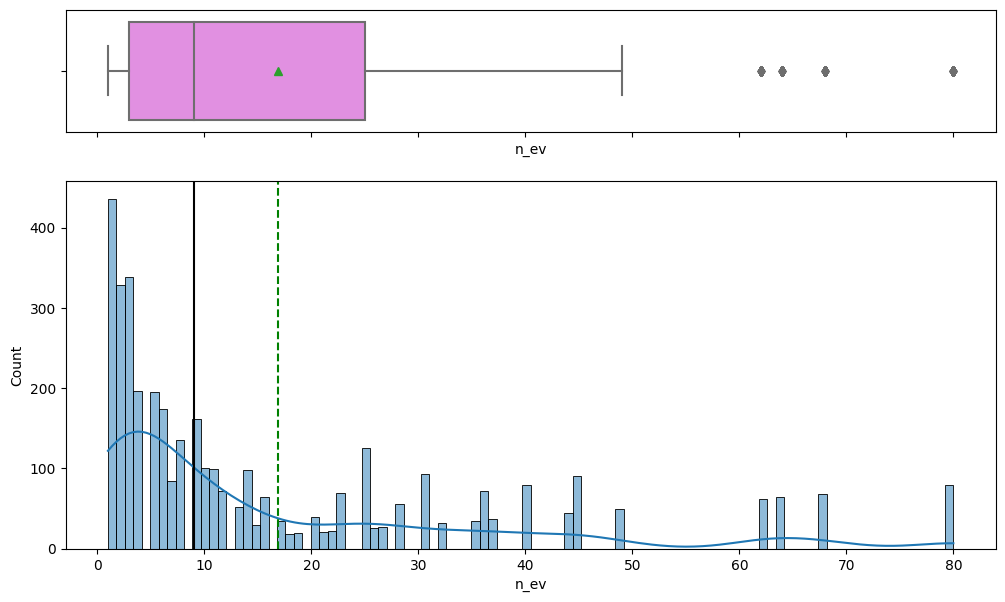

In [ ]:
# Histogram plot for number of EV charging stations

histogram_boxplot(df, "n_ev", kde = True, bins = 100)

## **Bivarate Analysis**

<Axes: >

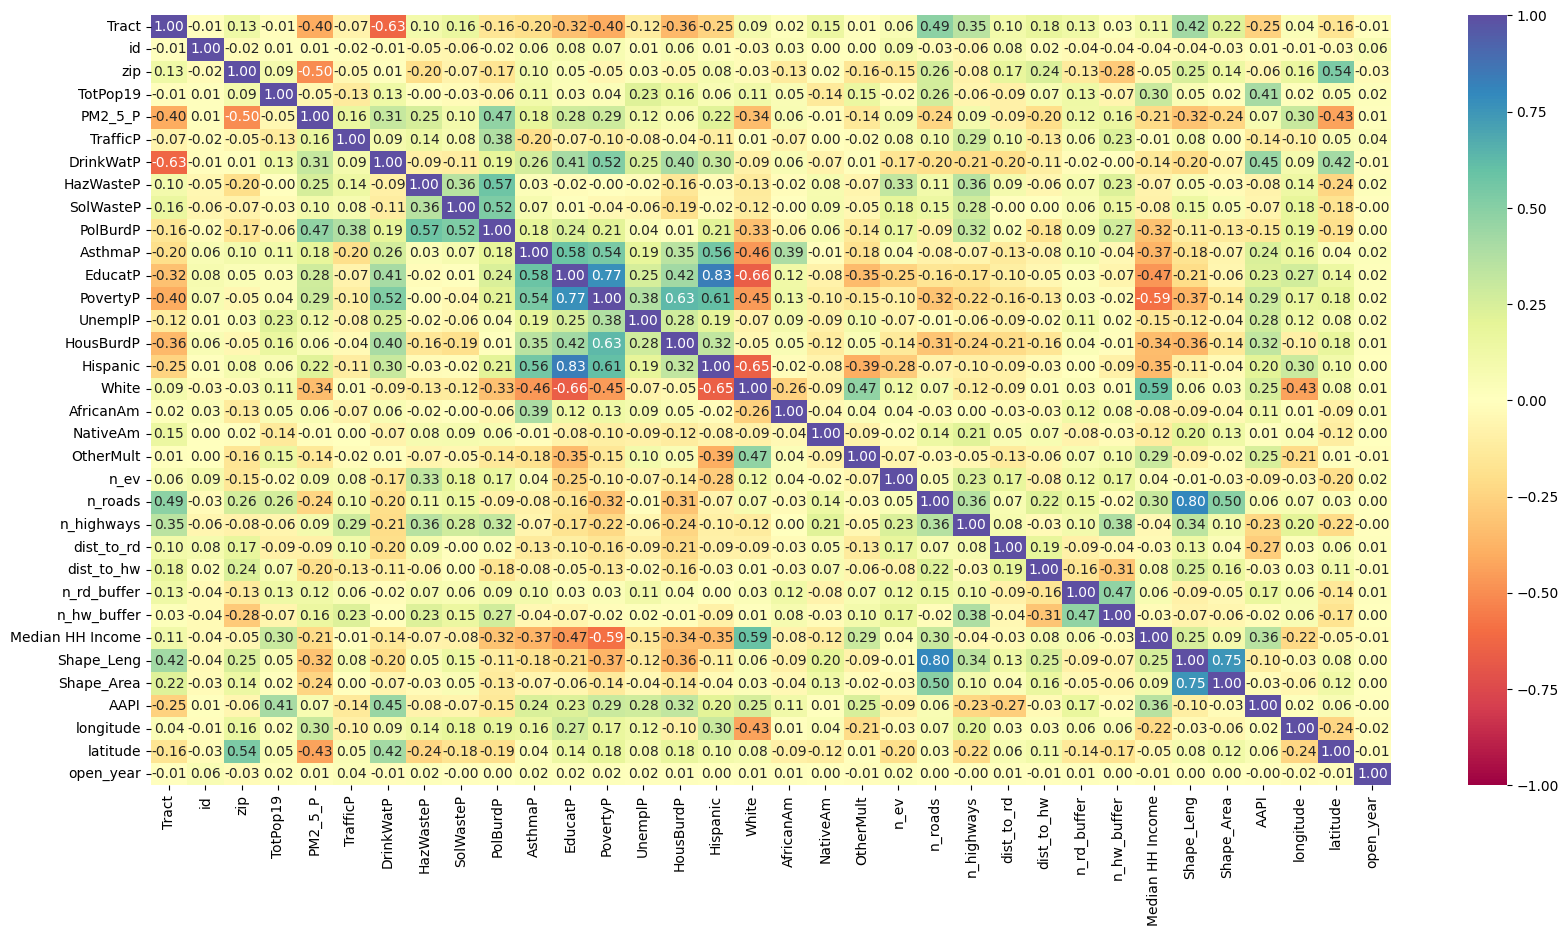

In [ ]:
# Finding the correlation between various columns of the dataset

plt.figure(figsize = (20,10))

sns.heatmap(df.corr(), annot = True, vmin = -1, vmax = 1, fmt = ".2f", cmap = "Spectral")

## **Data Preparation for Model Building**

In [ ]:
# Separating independent variables and the target variable 

# Define x variables

xvars = ["PM2_5_P", "TrafficP", "DrinkWatP", "HazWasteP", "SolWasteP",
       "PolBurdP", "AsthmaP", "EducatP", "PovertyP", "UnemplP", "HousBurdP",
       "n_roads", "n_highways", "dist_to_rd", "dist_to_hw",
       "n_rd_buffer", "n_hw_buffer", "Median HH Income", "open_year"]

x = df[xvars]

# Define y variable

yvar = "n_ev"

y = df[yvar]

# fit the data
df_to_fit = df[xvars+[yvar]].dropna()

In [ ]:
# Splitting the dataset into train and test datasets

x_train, x_test, y_train, y_test = train_test_split(df_to_fit[xvars], df_to_fit[yvar], test_size = 0.25, shuffle = True, random_state = 1)

# Checking the shape of the train and the test data

print("Shape of Training set : ", x_train.shape)

print("Shape of test set : ", x_test.shape)

Shape of Training set :  (2871, 19)
Shape of test set :  (957, 19)


## **Model building**

* We will be using different metrics functions defined in sklearn like RMSE, MAE, and 𝑅2 for regression model evaluation.
* We will define a function to calculate MAPE and the adjusted 𝑅2.
* The mean absolute percentage error (MAPE) measures the accuracy of predictions as a percentage and can be calculated as the average absolute percent error for each predicted value minus the actual value divided by the actual value. It works best if there are no extreme values in the data and none of the actual values are 0.

In [ ]:
# Function to compute the adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    
    r2 = r2_score(targets, predictions)
    
    n = predictors.shape[0]
    
    k = predictors.shape[1]
    
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# Function to compute MAPE

def mape_score(targets, predictions):
    
    return np.mean(np.abs(targets - predictions) / targets) * 100


# Function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    
    predictors: independent variables
    
    target: dependent variable
    """

    # Predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)                      # To compute R-squared
    
    adjr2 = adj_r2_score(predictors, target, pred)   # To compute adjusted R-squared
    
    rmse = np.sqrt(mean_squared_error(target, pred)) # To compute RMSE
    
    mae = mean_absolute_error(target, pred)          # To compute MAE
    
    mape = mape_score(target, pred)                  # To compute MAPE

    # Creating a dataframe of metrics
    
    df_perf = pd.DataFrame(
        {
            "RMSE":  rmse,
            "MAE":  mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        
        index = [0],
    )

    return df_perf

In [ ]:
# RMSE
def rmse(predictions, targets):
    return np.sqrt(((targets - predictions) ** 2).mean())


# MAPE
def mape(predictions, targets):
    return np.mean(np.abs((targets - predictions)) / targets) * 100


# MAE
def mae(predictions, targets):
    return np.mean(np.abs((targets - predictions)))


# Model performance on the test and the train data

def model_pref(olsmodel, x_train, x_test, y_train,y_test):

    # Prediction on the training data
    y_pred_train = olsmodel.predict(x_train)
    y_observed_train = y_train

    # Prediction on the test data
    y_pred_test = olsmodel.predict(x_test)
    y_observed_test = y_test

    print(
        pd.DataFrame(
            {
                "Data": ["Train", "Test"],
                "RMSE": [
                    rmse(y_pred_train, y_observed_train),
                    rmse(y_pred_test, y_observed_test),
                ],
                
                "MAE": [
                    mae(y_pred_train, y_observed_train),
                    mae(y_pred_test, y_observed_test),
                ],
                
                "MAPE": [
                    mape(y_pred_train, y_observed_train),
                    mape(y_pred_test, y_observed_test),
                ],
            }
        )
    ) 

**Linear Regression**

In [ ]:
import statsmodels.api as sm

# Statsmodel api does not add a constant by default, we need to add it explicitly
x_train1 = sm.add_constant(x_train)

# Add constant to the test data
x_test1 = sm.add_constant(x_test)

# Create the model
olsmodel1 = sm.OLS(y_train, x_train1).fit()

# Get the model summary
olsmodel1.summary()

print(olsmodel1.summary())

                            OLS Regression Results                            
Dep. Variable:                   n_ev   R-squared:                       0.292
Model:                            OLS   Adj. R-squared:                  0.288
Method:                 Least Squares   F-statistic:                     61.99
Date:                Wed, 31 May 2023   Prob (F-statistic):          1.33e-197
Time:                        05:18:02   Log-Likelihood:                -12065.
No. Observations:                2871   AIC:                         2.417e+04
Df Residuals:                    2851   BIC:                         2.429e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const              -19.5125     16.403  

In [ ]:
lin_reg_test = model_performance_regression(olsmodel1, x_test1, y_test)
lin_reg_test

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,16.734142,12.841557,0.278984,0.263578,258.042092


### Observation: 
As anticipated, the linear regression model appears to be unsuitable for this dataset, primarily due to the presence of numerous omitted variables, resulting in a low R-square value of 0.26. However, we can enhance the model in the future by implementing the following improvements:

1. Gathering more meaningful variables to incorporate into the model.
2. Including the omitted variables within the model to enhance its performance.
3. Scaling the variables using approaches such as log-level and level-log to
ensure consistency in their scales.

Consequently, we have decided against utilizing this linear regression model since it fails to offer any meaningful insights into the data.

**Decision Tree Regressor**

In [ ]:
# Choose the type of regressor 
dtree_tuned = DecisionTreeRegressor(random_state = 1)

# Grid of parameters to choose from
parameters = {'max_depth': np.arange(2, 8), 
              
              'criterion': ['squared_error', 'friedman_mse'],
              
              'min_samples_leaf': [1, 3, 5, 7],
              
              'max_leaf_nodes': [2, 5, 7] + [None]
             }

# Type of scoring used to compare parameter combinations
scorer = make_scorer(r2_score)

# Run the grid search
grid_obj = GridSearchCV(dtree_tuned, parameters, scoring = scorer, cv = 5)

grid_obj = grid_obj.fit(x_train,y_train)

# Set the dtree_tuned_regressor to the best combination of parameters
dtree_tuned_regressor = grid_obj.best_estimator_

dtree_tuned_regressor.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=7, random_state=1)

In [ ]:
# Look at the different between actual and predicted values 

y_pred = dtree_tuned_regressor.predict(x_test)

dtree_df = pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
dtree_df.head()

,Actual,Predicted
2343,5,10.342541
3248,25,25.305085
194,8,8.251429
17,8,29.326203
3214,1,3.258065


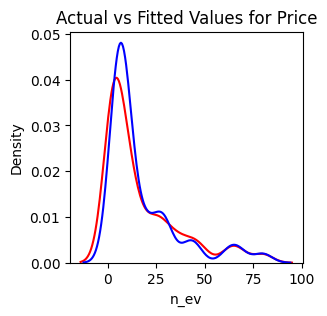

In [ ]:
plt.figure(figsize=(3, 3))


ax = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(y_pred, hist=False, color="b", label="Fitted Values" , ax=ax)


plt.title('Actual vs Fitted Values for Price')


plt.show()

In [ ]:
# Get the score of tuned decision tree regressor

dtree_tuned_regressor_perf_test = model_performance_regression(dtree_tuned_regressor, x_test, y_test)

dtree_tuned_regressor_perf_test

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,7.43961,4.42495,0.857492,0.854603,125.794267


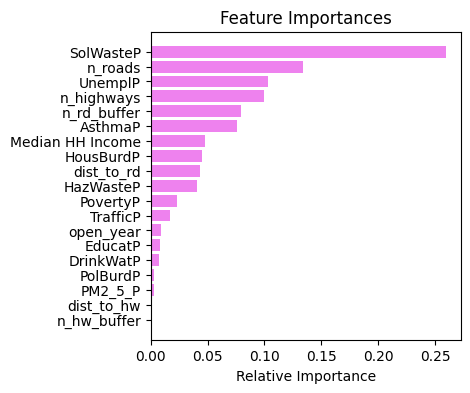

In [ ]:
# Plotting the feature importance
features = list(x.columns)

importances = dtree_tuned_regressor.feature_importances_

indices = np.argsort(importances)

plt.figure(figsize = (4, 4))

plt.title('Feature Importances')

plt.barh(range(len(indices)), importances[indices], color = 'violet', align = 'center')

plt.yticks(range(len(indices)), [features[i] for i in indices])

plt.xlabel('Relative Importance')

plt.show()

### Observation: 
The decision tree regressor outperforms the linear regression model, demonstrating superior predictive capabilities for the number of EV charging stations. Additionally, the decision tree model reveals significant features that contribute to the prediction. Surprisingly, SolWasteP (Solid Waste Percentage) emerges as the most influential feature in determining the number of EV charging stations. This finding suggests a potential correlation between high levels of solid waste and a larger population within a specific area. Consequently, it is logical to expect a greater number of EV charging stations in areas with higher population density. Furthermore, it is also reasonable to observe a positive relationship between the number of roads and the number of EV charging stations, indicating that areas with more extensive road networks tend to have a greater availability of charging infrastructure.

**Random Forest Regressor**

In [ ]:
rf_tuned = RandomForestRegressor(random_state = 1)

# Grid of parameters to choose from
parameters = {"n_estimators": [110, 120],
              
    "max_depth": [5, 7],
              
    "max_features": [0.8, 1]
             }

# Type of scoring used to compare parameter combinations
scorer = make_scorer(r2_score)

# Run the grid search
grid_obj = GridSearchCV(rf_tuned, parameters, scoring = scorer, cv = 5)

grid_obj = grid_obj.fit(x_train, y_train)

# Set the rf_tuned_regressor to the best combination of parameters
rf_tuned_regressor = grid_obj.best_estimator_

rf_tuned_regressor.fit(x_train, y_train)

RandomForestRegressor(max_depth=7, max_features=0.8, n_estimators=120,
                      random_state=1)

In [ ]:
# Look at the different between actual and predicted values 

y_pred = rf_tuned_regressor.predict(x_test)

dtree_df = pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
dtree_df.head()

,Actual,Predicted
2343,5,10.656702
3248,25,23.881545
194,8,8.864724
17,8,20.074065
3214,1,5.909665


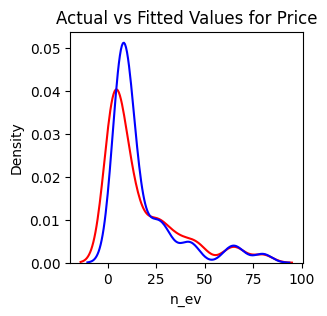

In [ ]:
plt.figure(figsize=(3, 3))


ax = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(y_pred, hist=False, color="b", label="Fitted Values" , ax=ax)


plt.title('Actual vs Fitted Values for Price')


plt.show()

In [ ]:
# Model Performance on the test data

rf_tuned_regressor_perf_test = model_performance_regression(rf_tuned_regressor, x_test, y_test)

rf_tuned_regressor_perf_test

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,5.861453,3.970799,0.91154,0.909746,131.470267


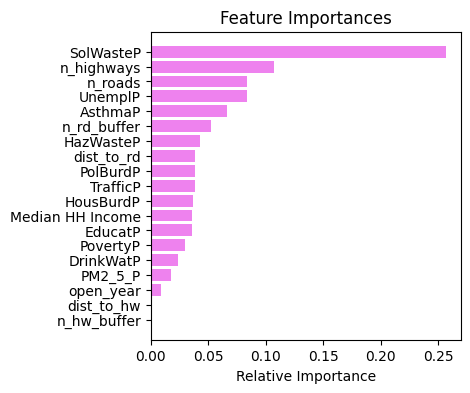

In [ ]:
# Plotting the feature importance
importances = rf_tuned_regressor.feature_importances_

indices = np.argsort(importances)

plt.figure(figsize = (4, 4))

plt.title('Feature Importances')

plt.barh(range(len(indices)), importances[indices], color = 'violet', align = 'center')

plt.yticks(range(len(indices)), [features[i] for i in indices])

plt.xlabel('Relative Importance')

plt.show()

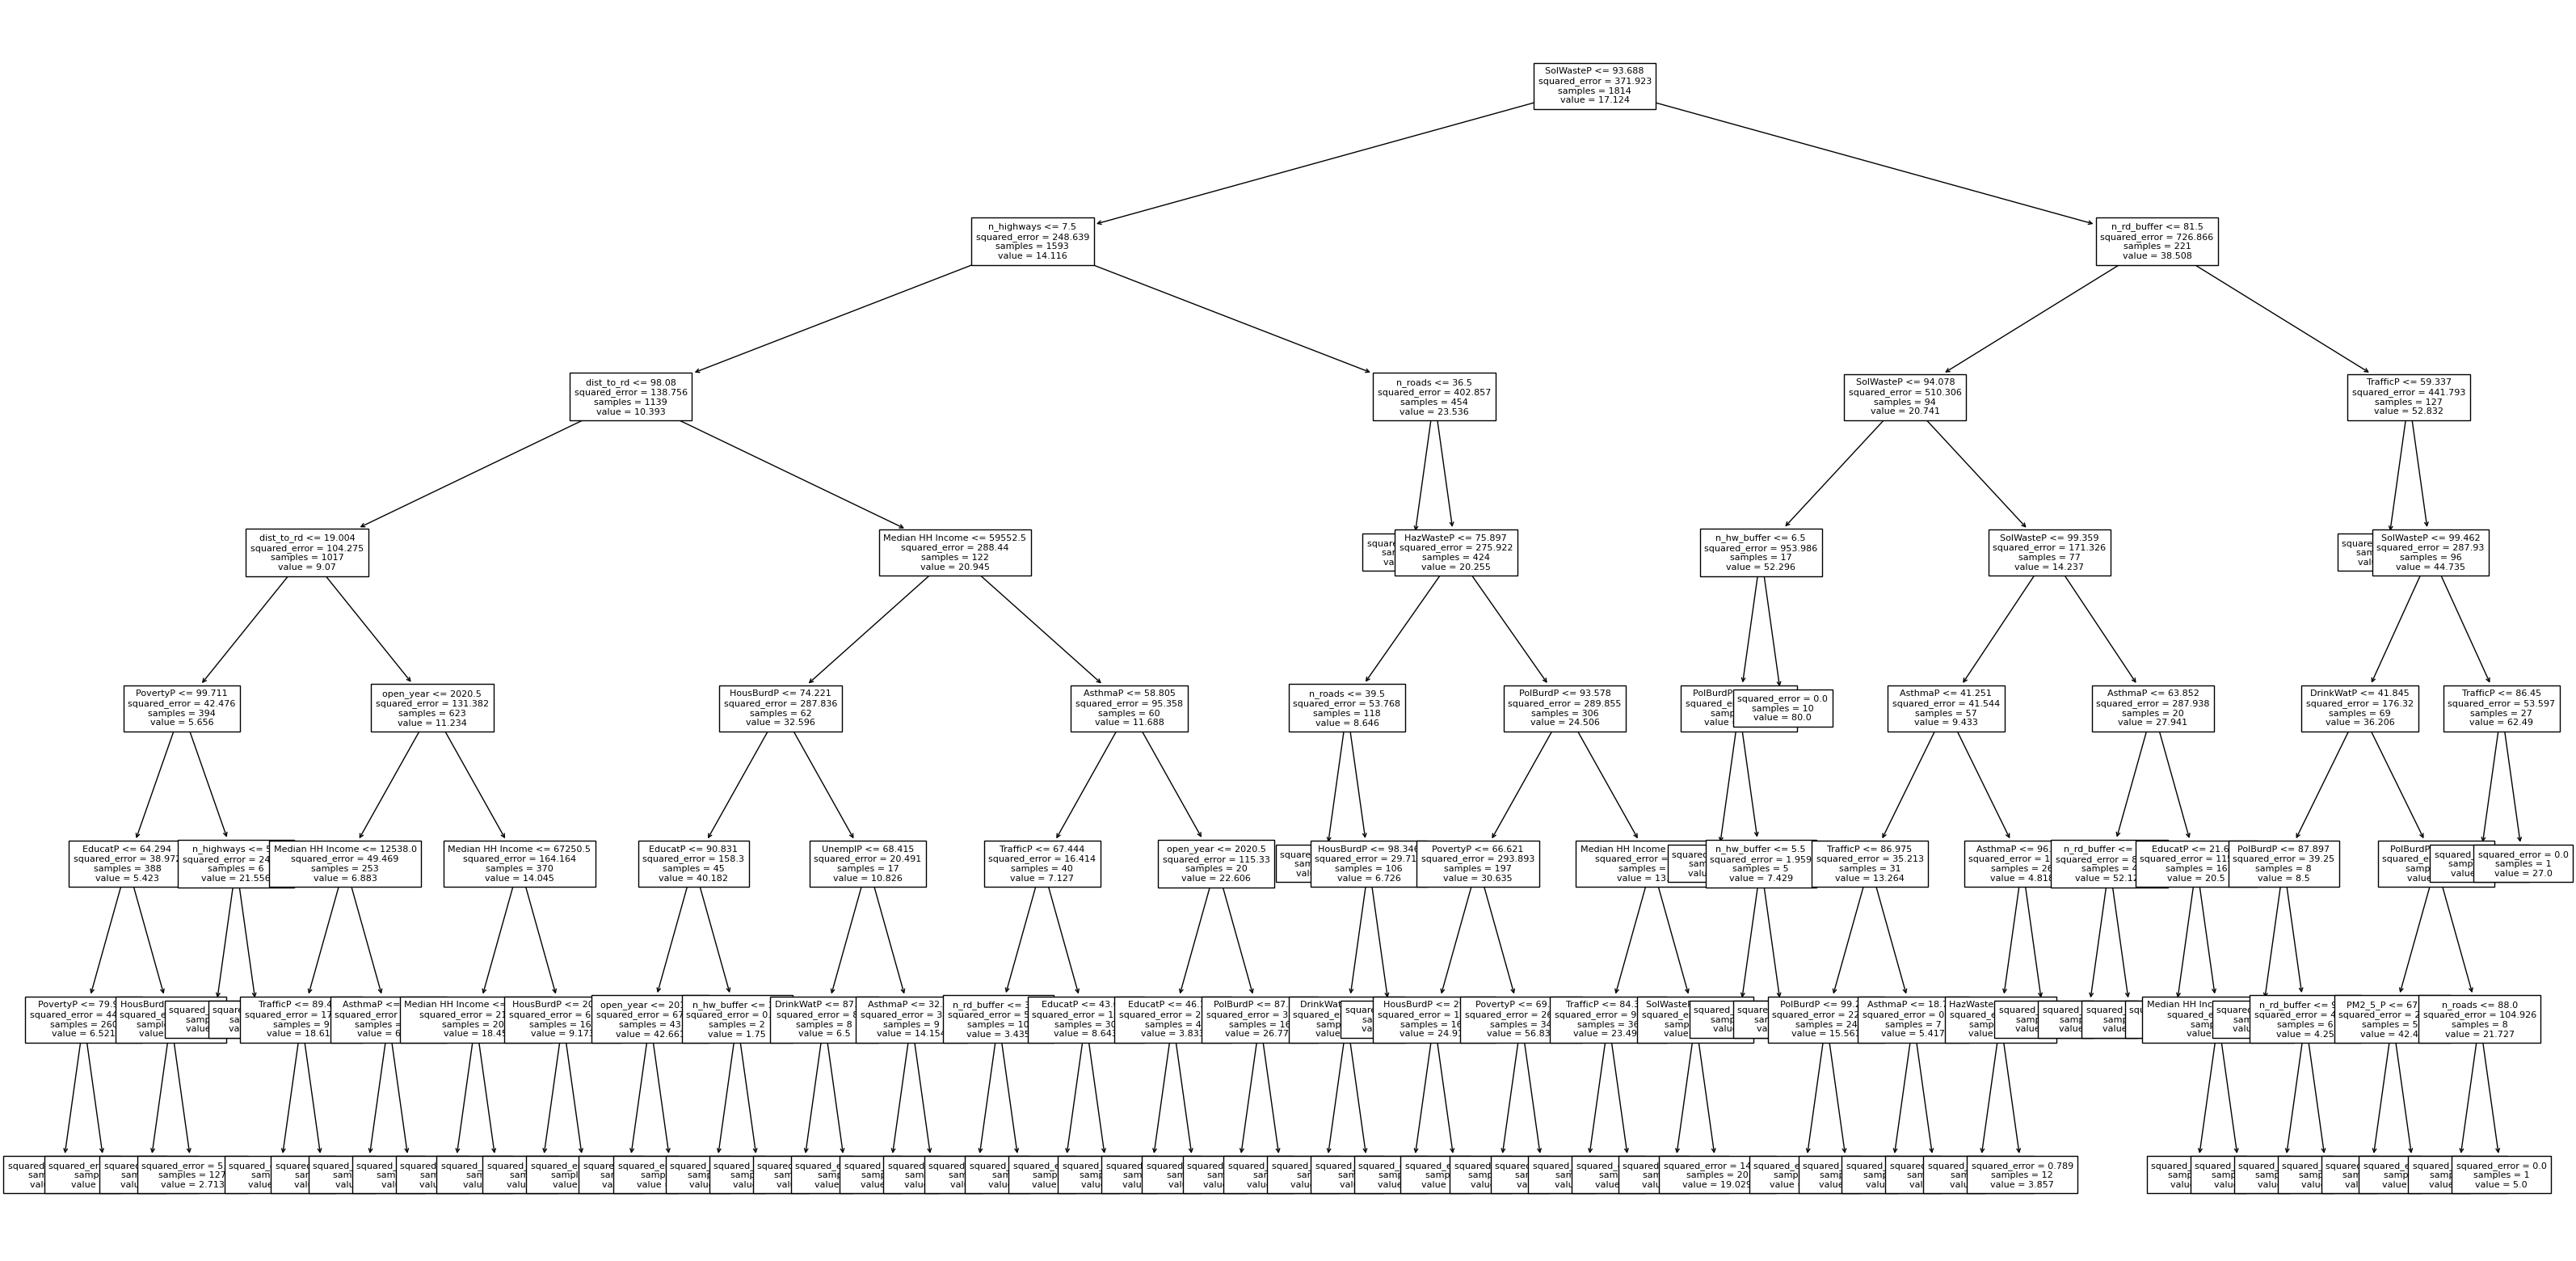

In [ ]:
# now we have over 100 estimators (trees), let's pick the first one to visualize
e = rf_tuned_regressor.estimators_[0]

from sklearn import tree
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(40,20))  
_ = tree.plot_tree(e, feature_names = x_train.columns, fontsize=8, ax = ax)

### Observation: 
The random forest regressor exhibits the highest performance score compared to other models, indicating its superior predictive capability. Furthermore, the significant features identified by the model offer valuable insights. Notably, the presence of a positive relationship between the number of roads and highways and the number of EV charging stations is observed. This suggests that areas with a higher density of road infrastructure tend to have a greater abundance of charging stations. However, it is noteworthy that SolWasteP (Solid Waste Percentage) continues to emerge as the most significant feature in predicting the number of EV charging stations. Intriguingly, when examining the visualized tree, it becomes apparent that a solid waste percentage of around 93% holds particular significance in defining the number of EV charging stations.

**Access performances**

In [ ]:
models_test_comp_df = pd.concat(
    [
        lin_reg_test.T,
        dtree_tuned_regressor_perf_test.T,
        rf_tuned_regressor_perf_test.T
    ],
    axis = 1,
)

models_test_comp_df.columns = [
    "Linear Regression",
    "Tuned Decision Tree regressor",
    "Tuned Random Forest Regressor"]

print("Test performance comparison:")

models_test_comp_df

Test performance comparison:


,Linear Regression,Tuned Decision Tree regressor,Tuned Random Forest Regressor
RMSE,16.734142,7.439610,5.861453
MAE,12.841557,4.424950,3.970799
R-squared,0.278984,0.857492,0.911540
Adj. R-squared,0.263578,0.854603,0.909746
MAPE,258.042092,125.794267,131.470267


When comparing the performance of the linear regression, decision tree regressor, and random forest regressor models, it becomes evident that the random forest regressor achieves the highest RMSE (Root Mean Square Error) score. As a result, we have decided to analyze the data based on the results obtained from the random forest regressor model for our final report. This choice is motivated by the superior performance and predictive accuracy demonstrated by the random forest model in this particular context.

## **Neural Network - Predicting Number of EV Charging Station**

To create a prediction model using a neural network, we have undertaken a conversion of the "n_ev" (number of EV charging stations) column into a categorical variable. This transformation involves categorizing each tract based on whether it has 30 or more EV charging stations. Subsequently, we employ a neural network model to build a predictive model using this categorical variable.

In [ ]:
# Library for Neural Network
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler

import tensorflow as tf

from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Dense, Dropout, Activation

In [ ]:
# Dataset

new_df = df.copy()

new_df.head()

,Tract,id,station_name,open_date,status_code,fuel_type_code,ev_connector_types,ev_network,groups_with_access_code,access_days_time,street_address,city,zip,state,County,TotPop19,PM2_5_P,TrafficP,DrinkWatP,HazWasteP,SolWasteP,PolBurdP,AsthmaP,EducatP,PovertyP,UnemplP,HousBurdP,Hispanic,White,AfricanAm,NativeAm,OtherMult,n_ev,n_roads,n_highways,dist_to_rd,dist_to_hw,n_rd_buffer,n_hw_buffer,Median HH Income,Shape_Leng,Shape_Area,AAPI,longitude,latitude,geometry,open_year
0,6037121102,1517,LADWP - Truesdale Center,1999-10-15,E,ELEC,"['CHADEMO', 'J1772', 'J1772COMBO']",Non-Networked,Private,Fleet use only,11797 Truesdale St,Sun Valley,91352,CA,Los Angeles,2479,58.543871,57.4125,83.127264,97.418928,99.977090,98.095831,66.787139,80.916224,75.716080,35.020822,96.730038,48.4873,45.9459,0.0000,0.0000,1.4925,2,72,5.0,50.553886,912.156136,4,0.0,48750.0,11461.974301,7.542610e+06,4.0742,-118.387971,34.248319,POINT (-118.3879713743439 34.2483191527193),1999
1,6037701100,1519,LADWP - West LA District Office,2020-02-28,E,ELEC,['J1772'],Non-Networked,Private,0,1394 S Sepulveda Blvd,Los Angeles,90024,CA,Los Angeles,1101,64.617299,98.7875,52.716373,88.232958,80.549828,94.660859,2.629611,68.969881,99.685930,99.986986,0.000000,26.5213,36.7847,22.4342,0.0000,4.6322,2,61,14.0,10.353718,0.966105,50,14.0,45536.0,8588.373341,2.532709e+06,9.6276,-118.448504,34.052542,POINT (-118.448504 34.052542),2020
2,6037224010,1523,Los Angeles Convention Center,1995-08-30,E,ELEC,['J1772'],Non-Networked,Public,5:30am-9pm; pay lot,1201 S Figueroa St,Los Angeles,90015,CA,Los Angeles,2845,88.848787,90.6625,92.531535,87.452019,0.000000,93.018046,86.104187,80.460643,93.115578,0.000000,93.726236,57.6098,13.8489,17.6450,0.0000,1.5466,7,90,6.0,55.780822,238.366528,162,9.0,28082.0,4231.359659,8.277289e+05,9.3497,-118.271387,34.040539,POINT (-118.271387 34.040539),1995
3,6037207400,1525,LADWP - John Ferraro Building,1999-10-15,E,ELEC,"['CHADEMO', 'J1772', 'J1772COMBO']",Non-Networked,Private,For fleet and employee use only,111 N Hope St,Los Angeles,90012,CA,Los Angeles,1539,91.922838,85.9625,92.531535,93.077432,96.013746,99.975109,26.333499,46.228803,60.452261,88.404477,0.000000,44.6394,15.0747,25.7310,0.7147,1.6894,28,59,16.0,43.549433,76.197839,110,13.0,87000.0,4622.080763,8.753278e+05,12.1508,-118.248589,34.059133,POINT (-118.248589 34.059133),1999
4,6037980007,1531,LADWP - Haynes Power Plant,2018-05-01,E,ELEC,"['CHADEMO', 'J1772', 'J1772COMBO']",Non-Networked,Private,Fleet use only,6801 E 2nd St,Long Beach,90803,CA,Los Angeles,0,60.883634,78.6500,0.000000,94.692257,93.631157,95.469820,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0000,0.0000,0.0000,0.0000,3,22,7.0,26.481397,15.112535,26,3.0,0.0,7332.585610,2.701084e+06,-1998.0000,-118.096665,33.759802,POINT (-118.096665 33.759802),2018


In [ ]:
# Converting the target variable into categorical variable (n_ev)

new_df['more_than_30stations'] = new_df['n_ev'].apply(lambda x: 1 if x >= 30 else 0)

<Axes: xlabel='SolWasteP', ylabel='n_highways'>

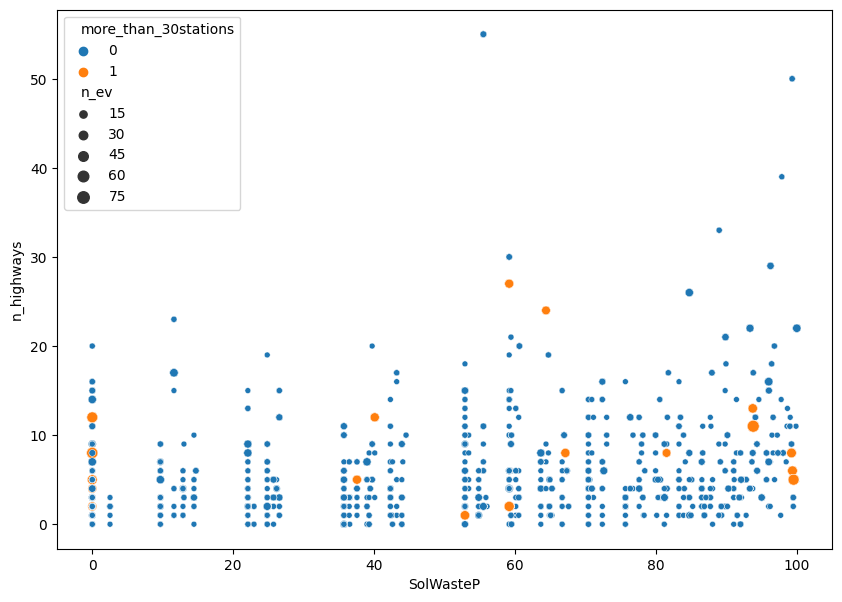

In [ ]:
plt.figure(figsize = (10, 7))

sns.scatterplot(data = new_df,
                 
           x = 'SolWasteP',

           y = 'n_highways',

           hue = 'more_than_30stations',

           size = 'n_ev')

### Observation: 
Since SolWasteP and n_highways are the most significant feature, let's use scatter plot to see the relationship between these two features. It seems like the tract with more than 8 highways and 40% of solid waste has more than 30 EV charging stations. 

In [ ]:
# Preparing the data

# Define features & target

xvars = ["PM2_5_P", "TrafficP", "DrinkWatP", "HazWasteP", "SolWasteP",
       "PolBurdP", "AsthmaP", "EducatP", "PovertyP", "UnemplP", "HousBurdP",
       "n_roads", "n_highways", "dist_to_rd", "dist_to_hw",
       "n_rd_buffer", "n_hw_buffer", "Median HH Income", "open_year"]

features = new_df[xvars]

yvar = ["more_than_30stations"]

target = new_df[yvar]

# Split data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test =  train_test_split(features, target, test_size = 0.25, random_state = 42)

# Now, we will perform scaling on the numerical variables separately for train and test sets. We will perform **fit** and **transform** on the train data and then we will only perform **transform** on the test data. 

scaler = MinMaxScaler()

# Here, we are passing all the features (numerical and categorical), that's okay as min-max scaler will not change values of categorical variables
X_train_normalized = scaler.fit_transform(X_train)

X_test_normalized = scaler.transform(X_test)

In [ ]:
# Fixing the seed for random number generators
np.random.seed(42)

import random

random.seed(42)

tf.random.set_seed(42)

Model 1

In [ ]:
# We will be adding the layers sequentially
model_1 = Sequential()

# First hidden layer with 128 neurons and relu activation function, the input_shape tuple denotes number of independent variables
model_1.add(Dense(128, activation = 'relu', input_shape = (19, )))

# We will be switching 20% of neurons randomly at each iteration to avoid overfitting
model_1.add(Dropout(0.2))

# Second hidden layer with 64 neurons and relu activation function
model_1.add(Dense(64, activation = 'relu'))

# We will be switching 10% of neurons off randomly at each iteration to avoid 
model_1.add(Dropout(0.1))

# Output layer with only one neuron and sigmoid as activation function which will give the probability of students getting admitted into UCLA  
model_1.add(Dense(1, activation = 'sigmoid'))

In [ ]:
model_1.compile(loss = 'binary_crossentropy', optimizer = 'adamax', metrics = ['accuracy'])

model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               2560      
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 10,881
Trainable params: 10,881
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history_1 = model_1.fit(X_train_normalized, 
                        
                    y_train,

                    validation_split = 0.1, 

                    epochs = 150, 

                    verbose = 2)

Epoch 1/150
81/81 - 2s - loss: 0.5248 - accuracy: 0.7782 - val_loss: 0.4808 - val_accuracy: 0.7951 - 2s/epoch - 27ms/step
Epoch 2/150
81/81 - 0s - loss: 0.4904 - accuracy: 0.7813 - val_loss: 0.4584 - val_accuracy: 0.7951 - 245ms/epoch - 3ms/step
Epoch 3/150
81/81 - 0s - loss: 0.4689 - accuracy: 0.7875 - val_loss: 0.4448 - val_accuracy: 0.8194 - 262ms/epoch - 3ms/step
Epoch 4/150
81/81 - 0s - loss: 0.4550 - accuracy: 0.7886 - val_loss: 0.4267 - val_accuracy: 0.8194 - 267ms/epoch - 3ms/step
Epoch 5/150
81/81 - 0s - loss: 0.4404 - accuracy: 0.7952 - val_loss: 0.4141 - val_accuracy: 0.8264 - 270ms/epoch - 3ms/step
Epoch 6/150
81/81 - 0s - loss: 0.4269 - accuracy: 0.7995 - val_loss: 0.4006 - val_accuracy: 0.8264 - 281ms/epoch - 3ms/step
Epoch 7/150
81/81 - 0s - loss: 0.4098 - accuracy: 0.8057 - val_loss: 0.3866 - val_accuracy: 0.8264 - 236ms/epoch - 3ms/step
Epoch 8/150
81/81 - 0s - loss: 0.3965 - accuracy: 0.8103 - val_loss: 0.3745 - val_accuracy: 0.8333 - 209ms/epoch - 3ms/step
Epoch 9/15

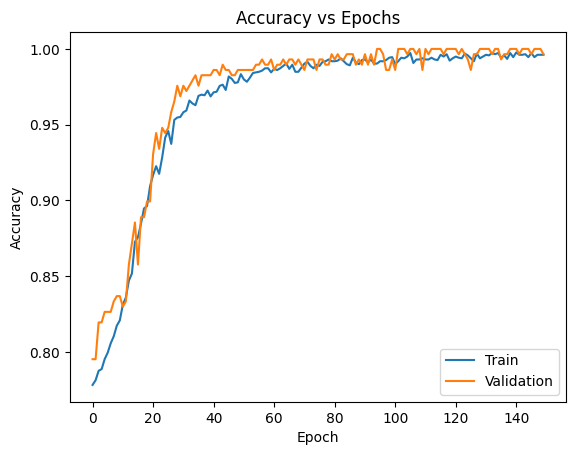

In [ ]:
plt.plot(history_1.history['accuracy'])

plt.plot(history_1.history['val_accuracy'])

plt.title('Accuracy vs Epochs')

plt.ylabel('Accuracy')

plt.xlabel('Epoch')

plt.legend(['Train', 'Validation'], loc = 'lower right')

plt.show()

Model 2

In [ ]:
# Clearing the backend
from tensorflow.keras import backend

backend.clear_session()

In [ ]:
# Fixing the seed for random number generators
np.random.seed(42)

import random

random.seed(42)

tf.random.set_seed(42)

In [ ]:
model_2 = Sequential()

model_2.add(Dense(256, activation = 'tanh', input_shape = (19, )))

model_2.add(Dropout(0.1))

model_2.add(Dense(128, activation = 'tanh'))

model_2.add(Dropout(0.1))

model_2.add(Dense(64, activation = 'tanh'))

model_2.add(Dropout(0.1))

model_2.add(Dense(32, activation = 'tanh'))

model_2.add(Dense(1, activation = 'sigmoid'))

In [ ]:
model_2.compile(loss = 'binary_crossentropy', optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001), metrics = ['accuracy'])

model_2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               5120      
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 32)                2

In [ ]:
history_2 = model_2.fit(X_train_normalized, 
                        
                    y_train,

                    validation_split = 0.1,

                    epochs = 200,

                    verbose = 2)

Epoch 1/200
81/81 - 2s - loss: 0.4946 - accuracy: 0.7820 - val_loss: 0.4398 - val_accuracy: 0.8229 - 2s/epoch - 26ms/step
Epoch 2/200
81/81 - 0s - loss: 0.4540 - accuracy: 0.7917 - val_loss: 0.4157 - val_accuracy: 0.8090 - 370ms/epoch - 5ms/step
Epoch 3/200
81/81 - 0s - loss: 0.4331 - accuracy: 0.7971 - val_loss: 0.4248 - val_accuracy: 0.8056 - 330ms/epoch - 4ms/step
Epoch 4/200
81/81 - 0s - loss: 0.3766 - accuracy: 0.8242 - val_loss: 0.3312 - val_accuracy: 0.8299 - 364ms/epoch - 4ms/step
Epoch 5/200
81/81 - 0s - loss: 0.3253 - accuracy: 0.8486 - val_loss: 0.2975 - val_accuracy: 0.8403 - 310ms/epoch - 4ms/step
Epoch 6/200
81/81 - 0s - loss: 0.2880 - accuracy: 0.8734 - val_loss: 0.2512 - val_accuracy: 0.8854 - 307ms/epoch - 4ms/step
Epoch 7/200
81/81 - 0s - loss: 0.2417 - accuracy: 0.8928 - val_loss: 0.2090 - val_accuracy: 0.8993 - 325ms/epoch - 4ms/step
Epoch 8/200
81/81 - 0s - loss: 0.2200 - accuracy: 0.9001 - val_loss: 0.2446 - val_accuracy: 0.8854 - 323ms/epoch - 4ms/step
Epoch 9/20

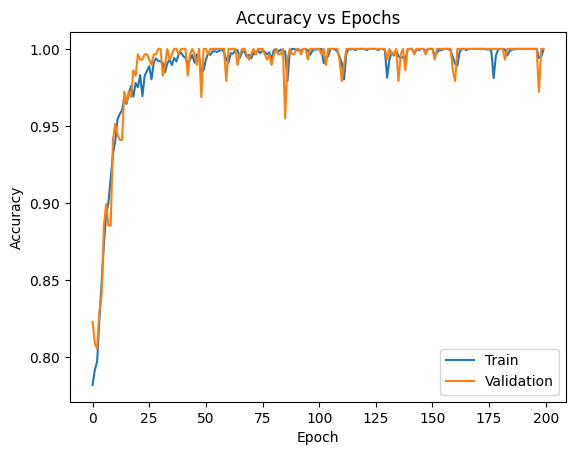

In [ ]:
plt.plot(history_2.history['accuracy'])

plt.plot(history_2.history['val_accuracy'])

plt.title('Accuracy vs Epochs')

plt.ylabel('Accuracy')

plt.xlabel('Epoch')

plt.legend(['Train', 'Validation'], loc  = 'lower right')

plt.show()

In [ ]:
model_2.evaluate(X_test_normalized, y_test, verbose = 1)

test_pred = np.round(model_2.predict(X_test_normalized))

30/30 [==============================] - 0s 2ms/step


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       776
           1       0.99      1.00      1.00       181

    accuracy                           1.00       957
   macro avg       1.00      1.00      1.00       957
weighted avg       1.00      1.00      1.00       957



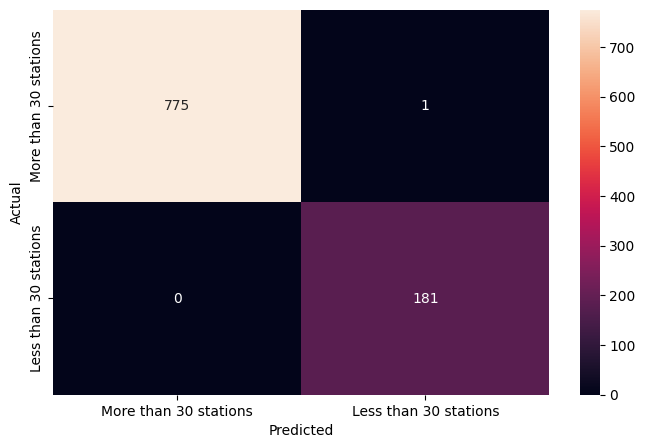

In [ ]:
from sklearn.metrics import classification_report

from sklearn.metrics import confusion_matrix

print(classification_report(y_test, test_pred))

cm = confusion_matrix(y_test, test_pred)

plt.figure(figsize = (8, 5))

sns.heatmap(cm, annot = True,  fmt = '.0f', xticklabels = ['More than 30 stations', 'Less than 30 stations'], yticklabels = ['More than 30 stations', 'Less than 30 stations'])

plt.ylabel('Actual')

plt.xlabel('Predicted')

plt.show()

Model 3

In [ ]:
# Clearing the backend
from tensorflow.keras import backend

backend.clear_session()

In [ ]:
# Fixing the seed for random number generators
np.random.seed(42)

import random

random.seed(42)

tf.random.set_seed(42)

In [ ]:
model_3 = Sequential()

model_3.add(Dense(128, activation = 'tanh', input_shape = (19, )))

model_3.add(Dropout(0.1))

model_3.add(Dense(64, activation = 'tanh'))

model_3.add(Dropout(0.1))

model_3.add(Dense(32, activation = 'tanh'))

model_3.add(Dense(1, activation = 'sigmoid'))

In [ ]:
model_3.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

model_3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               2560      
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 12,929
Trainable params: 12,929
Non-traina

In [ ]:
history_3 = model_3.fit(X_train_normalized,
                         
                    y_train, 

                    validation_split = 0.1,

                    epochs = 100,

                    verbose = 2)

Epoch 1/100
81/81 - 2s - loss: 0.5067 - accuracy: 0.7696 - val_loss: 0.4386 - val_accuracy: 0.8368 - 2s/epoch - 27ms/step
Epoch 2/100
81/81 - 0s - loss: 0.4619 - accuracy: 0.7875 - val_loss: 0.4283 - val_accuracy: 0.8229 - 259ms/epoch - 3ms/step
Epoch 3/100
81/81 - 0s - loss: 0.4411 - accuracy: 0.7991 - val_loss: 0.4330 - val_accuracy: 0.8160 - 286ms/epoch - 4ms/step
Epoch 4/100
81/81 - 0s - loss: 0.4164 - accuracy: 0.8080 - val_loss: 0.3947 - val_accuracy: 0.8125 - 268ms/epoch - 3ms/step
Epoch 5/100
81/81 - 0s - loss: 0.3943 - accuracy: 0.8041 - val_loss: 0.3762 - val_accuracy: 0.8021 - 256ms/epoch - 3ms/step
Epoch 6/100
81/81 - 0s - loss: 0.3749 - accuracy: 0.8146 - val_loss: 0.3545 - val_accuracy: 0.8125 - 296ms/epoch - 4ms/step
Epoch 7/100
81/81 - 0s - loss: 0.3551 - accuracy: 0.8227 - val_loss: 0.3438 - val_accuracy: 0.8229 - 255ms/epoch - 3ms/step
Epoch 8/100
81/81 - 0s - loss: 0.3429 - accuracy: 0.8208 - val_loss: 0.3292 - val_accuracy: 0.8333 - 267ms/epoch - 3ms/step
Epoch 9/10

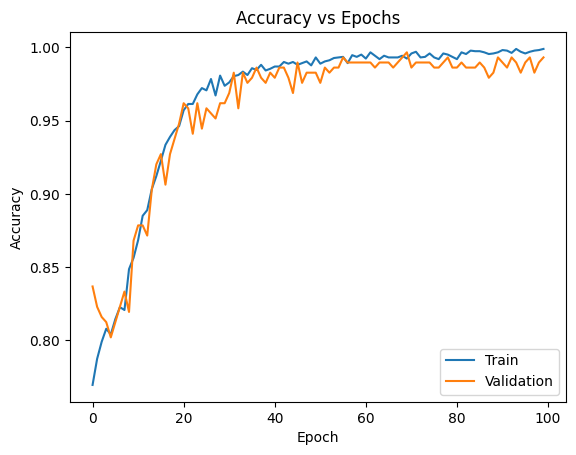

In [ ]:
plt.plot(history_3.history['accuracy'])

plt.plot(history_3.history['val_accuracy'])

plt.title('Accuracy vs Epochs')

plt.ylabel('Accuracy')

plt.xlabel('Epoch')

plt.legend(['Train', 'Validation'], loc = 'lower right')

plt.show()

In [ ]:
model_3.evaluate(X_test_normalized, y_test, verbose = 1)

test_pred = np.round(model_3.predict(X_test_normalized))

30/30 [==============================] - 0s 1ms/step


              precision    recall  f1-score   support

           0       1.00      0.99      1.00       776
           1       0.98      1.00      0.99       181

    accuracy                           1.00       957
   macro avg       0.99      1.00      0.99       957
weighted avg       1.00      1.00      1.00       957



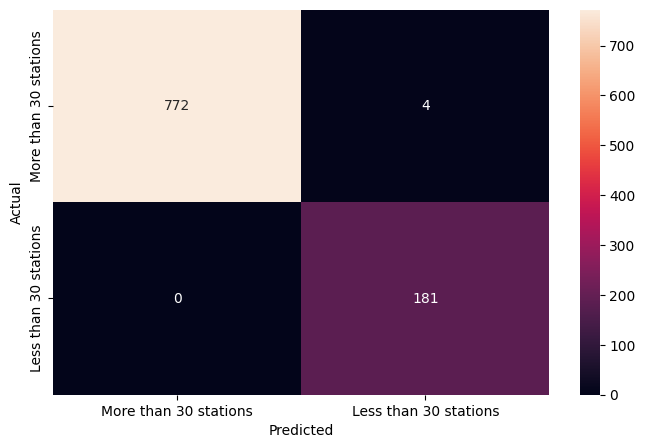

In [ ]:
from sklearn.metrics import classification_report

from sklearn.metrics import confusion_matrix

print(classification_report(y_test, test_pred))

cm = confusion_matrix(y_test, test_pred)

plt.figure(figsize = (8, 5))

sns.heatmap(cm, annot = True,  fmt = '.0f', xticklabels = ['More than 30 stations', 'Less than 30 stations'], yticklabels = ['More than 30 stations', 'Less than 30 stations'])

plt.ylabel('Actual')

plt.xlabel('Predicted')

plt.show()

### Conclusion for neural network model
Based on the assessment of the model's performance metrics, such as precision, recall, and F1 score, which all exceed 95%, it appears that our neural network model is performing exceptionally well on the given data. However, we should exercise caution as the presence of biases within the dataset could potentially lead to overfitting. To mitigate this risk, it is crucial to ensure that our data is sufficiently large and free from biases. Consequently, despite the neural network model's capabilities for predicting the number of EV charging stations, we have decided not to include it in our final report.